## Observations and Insights

## Dependencies and starter code

In [179]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [180]:

# Combine the data into a single dataset

In [181]:
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [182]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [183]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [184]:
# create a subset for grouping by

In [185]:
tumor_volume=df[["Drug Regimen","Tumor Volume (mm3)"]]

In [186]:
#getting Describe() statistics

In [187]:
tumor_volume_stat=tumor_volume.groupby("Drug Regimen").describe()

In [188]:
#getting Standard Error (SEM) stats

In [189]:
tumor_volume_sem=tumor_volume.groupby("Drug Regimen").sem()

In [190]:
tumor_volume_stat

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [191]:
#Renaming column in SEM df

In [192]:
tumor_volume_sem=tumor_volume_sem.rename({"Tumor Volume (mm3)":"SEM"},axis=1)

In [193]:
tumor_volume_sem

,SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [194]:
#merging Describe and SEM dfs

In [195]:
tumor_volume_final=pd.merge(tumor_volume_stat,tumor_volume_sem,how="left",on=["Drug Regimen"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [196]:
#renaming columns in resulting df

In [197]:
tumor_volume_final.columns=['Count','Mean','STD','MIN','25%','Meidan','75%','MAX','SEM']

In [198]:
tumor_volume_final

,Count,Mean,STD,MIN,25%,Meidan,75%,MAX,SEM
Drug Regimen,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111


## Bar plots

In [199]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

In [200]:
data_point_df=tumor_volume_final[["Count"]]
#tumor_list

In [201]:
data_point_fin=data_point_df.reset_index()


In [202]:
data_point_fin.columns=['Treatment','Count']
data_point_fin

,Treatment,Count
0,Capomulin,230.0
1,Ceftamin,178.0
2,Infubinol,178.0
3,Ketapril,188.0
4,Naftisol,186.0
5,Placebo,181.0
6,Propriva,161.0
7,Ramicane,228.0
8,Stelasyn,181.0
9,Zoniferol,182.0


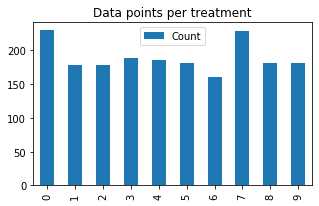

<Figure size 432x288 with 0 Axes>

In [203]:
data_point_fin.plot(kind="bar",figsize=(5,3))

#set title
plt.title("Data points per treatment")
plt.show()
plt.tight_layout()


In [204]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

In [205]:
#set x axis and Tick locations
x_axis=np.arange(len(data_point_fin))
tick_locations=[x for x in x_axis]

([<matplotlib.axis.XTick at 0x1c260d2e9c8>,
 <a list of 10 Text xticklabel objects>)

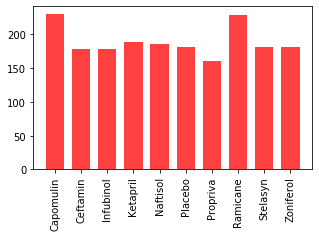

In [206]:
#setting plot
plt.figure(figsize=(5,3))
plt.bar(x_axis,data_point_fin["Count"],color='r',alpha=0.75,width=0.7,align="center")
plt.xticks(tick_locations,data_point_fin["Treatment"],rotation="vertical")

(0, 230.0)

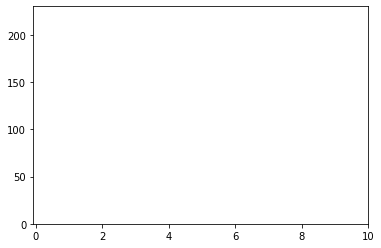

In [207]:
#setting X and y limits
plt.xlim(-.075,len(x_axis))
plt.ylim(0,max(data_point_fin['Count']))

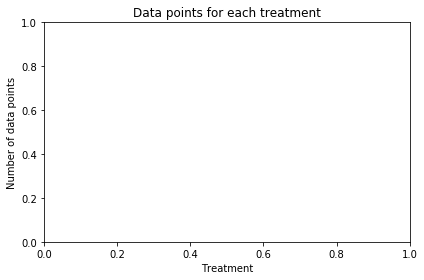

In [208]:
#set title and labels
plt.title("Data points for each treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of data points")
plt.tight_layout()


## Pie plots

In [209]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [210]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [211]:
df_pie=df[["Drug Regimen","Sex"]]
df_pie

,Drug Regimen,Sex
0,Ramicane,Male
1,Ramicane,Male
2,Ramicane,Male
3,Ramicane,Male
4,Ramicane,Male
...,...,...
1888,Naftisol,Male
1889,Naftisol,Male
1890,Naftisol,Male
1891,Naftisol,Male


In [212]:
df_pie_group=df_pie.groupby("Sex").count()
df_pie_group.head()

,Drug Regimen
Sex,
Female,935
Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C261066788>],
      dtype=object)

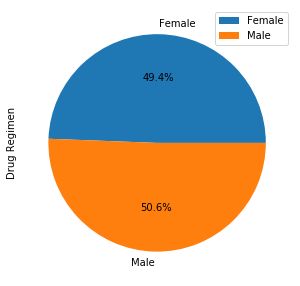

In [213]:
df_pie_group.plot(kind="pie",subplots=True,figsize=(5,5),autopct="%1.1f%%")


In [214]:
df_pie_mat=df[["Drug Regimen","Sex"]]
df_pie_mat.columns=["Drug","Gender"]

In [215]:
df_mat_group=df_pie_mat.groupby("Gender").count()
df_mat_group

,Drug
Gender,
Female,935
Male,958


In [216]:

v=df_mat_group.reset_index()
v

,Gender,Drug
0,Female,935
1,Male,958


In [217]:
sex=v["Gender"].tolist()
sex

['Female', 'Male']

In [218]:
count=v["Drug"].tolist()
count

[935, 958]

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

([<matplotlib.patches.Wedge at 0x1c2610daf08>,
 [Text(-1.026293775479775, 0.39588014147146805, 'Female'),
  Text(1.026293775479775, -0.39588014147146816, 'Male')],
 [Text(-0.5597966048071499, 0.21593462262080074, '49.4%'),
  Text(0.5597966048071499, -0.2159346226208008, '50.6%')])

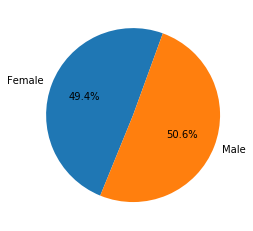

In [220]:
plt.pie(count,labels=sex,autopct="%1.1f%%",startangle=70)


## Quartiles, outliers and boxplots

In [221]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [222]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
best_regimen_pr=df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
best_regimen=best_regimen_pr[best_regimen_pr['Timepoint']>=45]
best_regimen

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837
1872,z581,Infubinol,45,62.754451
1882,z795,Naftisol,45,65.741070


In [223]:
best_grouped=best_regimen.groupby(['Drug Regimen']).mean()
best_grouped=best_grouped.reset_index()
best_grouped
best_sorted=best_grouped.sort_values(by='Tumor Volume (mm3)',ascending=True)
best_sorted

,Drug Regimen,Timepoint,Tumor Volume (mm3)
7,Ramicane,45,34.955595
0,Capomulin,45,36.236114
1,Ceftamin,45,64.132421
2,Infubinol,45,65.755562
9,Zoniferol,45,65.960888
6,Propriva,45,66.258529
5,Placebo,45,68.084082
8,Stelasyn,45,68.438310
4,Naftisol,45,69.265506
3,Ketapril,45,70.662958


In [224]:
list0=best_sorted['Drug Regimen'].tolist()
list0


['Ramicane',
 'Capomulin',
 'Ceftamin',
 'Infubinol',
 'Zoniferol',
 'Propriva',
 'Placebo',
 'Stelasyn',
 'Naftisol',
 'Ketapril']

In [225]:
best_four=best_sorted.iloc[:4]
bf1=best_four.reset_index()
#bf1
list1=bf1['Drug Regimen'].tolist()
list1

['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']

In [226]:
best_four_df=best_regimen[best_regimen['Drug Regimen'].isin(list1)]
best_four_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [227]:
#fin_tumor_df=best_regimen.groupby(['Drug Regimen','Mouse ID']).max()
#fin_one=fin_tumor_df.reset_index()
#fin_one
#fin_tumor=fin_one[fin_one['Drug Regimen'].isin(list1)]
#fin_tumor

In [228]:
fin_tumor_df=best_four_df.groupby(['Drug Regimen','Mouse ID']).max()
fin_tumor_df

Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           38.982878
             b742             45           38.939633
             g288             45           37.074024
             g316             45           40.159220
             i557             45           47.685963
...                          ...                 ...
Ramicane     q597             45           45.220869
             r811             45           37.225650
             s508             45           30.276232
             u196             45           40.667713
             z578             45           30.638696

[63 rows x 2 columns]

In [229]:
quartile=fin_tumor_df.quantile([.25,.5,.75])
#quartile
lowerq=quartile.loc[0.25]
upperq=quartile.loc[0.75]
iqr=upperq-lowerq

In [230]:
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range: {iqr}")
print(f"The the median of Tumor Volume is: {quartile.loc[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile is: Timepoint             45.000000
Tumor Volume (mm3)    33.480027
Name: 0.25, dtype: float64
The upper quartile is: Timepoint             45.000000
Tumor Volume (mm3)    62.142214
Name: 0.75, dtype: float64
The interquartile range: Timepoint              0.000000
Tumor Volume (mm3)    28.662186
dtype: float64
The the median of Tumor Volume is: Timepoint             45.00000
Tumor Volume (mm3)    40.15922
Name: 0.5, dtype: float64 
Values below Timepoint             45.000000
Tumor Volume (mm3)    -9.513252
dtype: float64 could be outliers.
Values above Timepoint              45.000000
Tumor Volume (mm3)    105.135493
dtype: float64 could be outliers.


In [231]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

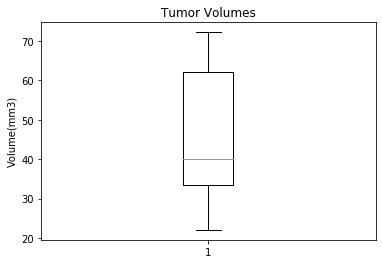

In [232]:
fin_tumor_bp=fin_tumor_df['Tumor Volume (mm3)']
fig1,ax1=plt.subplots()
ax1.set_title('Tumor Volumes')
ax1.set_ylabel('Volume(mm3)')
ax1.boxplot(fin_tumor_bp)
plt.show()

## Line and scatter plots

In [233]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [234]:
capom_df=df.loc[df['Drug Regimen']=='Capomulin']
capom_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [235]:
list2=capom_df['Mouse ID'].tolist()
#list2

In [236]:
rand_id=random.choice(list2)
#rand_id

In [237]:
capom_fin=capom_df.loc[capom_df['Mouse ID']==rand_id]

In [238]:
#capom_fin

In [239]:
capom_fin_plot=capom_fin[['Timepoint','Tumor Volume (mm3)']]
capom_fin_plot=capom_fin_plot.set_index('Timepoint')
#capom_fin_plot

Text(0.5, 1.0, 'Time point versus tumor volume')

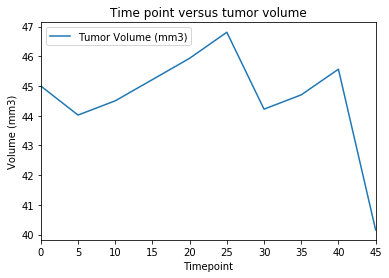

In [240]:
capom_fin_plot.plot()
plt.ylabel('Volume (mm3)')
plt.title('Time point versus tumor volume')

In [241]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capom_fin_df=capom_df.groupby('Mouse ID')
#capom_fin_plot=capom_fin_plot.set_index('Timepoint')
#capom_fin_df

In [242]:
capom_weight=capom_df[['Mouse ID','Weight (g)']]
capom1=capom_weight.groupby('Mouse ID').first()
#capom_weight=capom_weight.set_index('Weight (g)')
#capom1

,Weight (g)
Mouse ID,
b128,22
b742,21
f966,17
g288,19
g316,22
i557,24
i738,20
j119,23
j246,21


In [243]:
capom_volume=capom_df[['Mouse ID','Tumor Volume (mm3)']]
capom2=capom_volume.groupby('Mouse ID').mean()
capom2

,Tumor Volume (mm3)
Mouse ID,
b128,41.963636
b742,40.083699
f966,36.505973
g288,41.990097
g316,44.613344
i557,44.805810
i738,39.141053
j119,44.465236
j246,43.216925


In [244]:
capom_plot=pd.merge(capom1,capom2,how='left',on=['Mouse ID'])
capom_plot

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


In [245]:
x_axis=capom_plot['Weight (g)']
y_axis=capom_plot['Tumor Volume (mm3)']

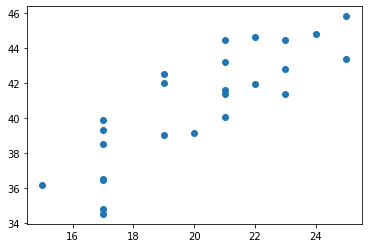

In [246]:
plt.scatter(x_axis,y_axis, marker="o")

In [247]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen